# Ejercicios Básicos 

**Integrantes**: 

- Murrieta Villegas Alfonso
- C. Nathaniel Ceballos Equihua

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# 1. Abrir y escribir una imagen en un archivo



In [ ]:
from scipy import misc
from scipy import ndimage
import imageio as io 
import matplotlib.pyplot as plt
import numpy as np 

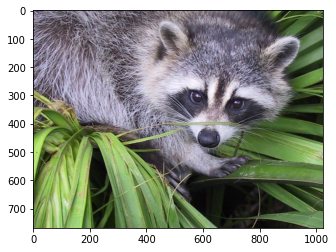

In [ ]:
f = misc.face()
io.imwrite('face.png', f) # Para guardar 
plt.imshow(f)
plt.show()


# 2. Creación de un arreglo numpy de un archivo de imagen



In [ ]:
from scipy import misc 
import imageio as io

face = misc.face()
io.imwrite('face.png', face)
face = io.imread('face.png')
print(type(face))
face.shape
#face.dtype

<class 'imageio.core.util.Array'>


(768, 1024, 3)

<class 'numpy.ndarray'>
(768, 1024)


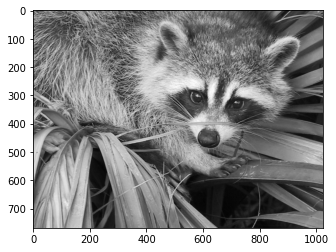

In [ ]:
from skimage.color import  rgb2gray
face = rgb2gray(face)
print(type(face))
print(face.shape)
plt.imshow(face, cmap = 'gray')
plt.show()

**¿De qué tipo es la variable face?**

Es una clase u objeto de tipo "imageio", que podría interpretarse como un arreglo o matriz con datos de tipo "int de 8 bits"

**¿Qué resultado arroja face.shape?**

Nos muestra en los dos primeros datos el tamaño en pixeles ancho y largo, además de la "profundidad", es decir, en este caso el RGB por eso 3


**Si fuera una imagen en tonos de gris, ¿cuál sería el resultado esperado de face.shape?**

Una matriz de datos, específicamente un arreglo bidimensional donde al igual que en en la versión de color se tiene el largo y el ancho solo que no se tiene las componentes del esquema de color




# 3. Abrir archivos raw




In [ ]:
face = misc.face()
io.imsave('face.png', face)
face = io.imread('face.png')

face.tofile('face.raw')
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

(2359296,)

**¿Qué resultado arroja la primera instrucción face_from_raw.shape?**

(2359296,)




# 4. Despliegue de imágenes



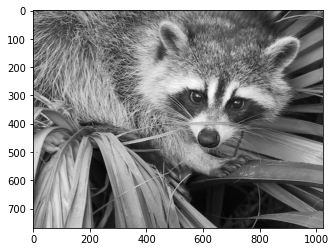

In [ ]:
f = misc.face(gray=True)
plt.imshow(f, cmap=plt.cm.gray)

**¿Qué pasa si al desplegar la imagen con plt.imshow no se especifica el mapa de color
plt.cm.gray?**

Tomaria el valor de la variable cmap 


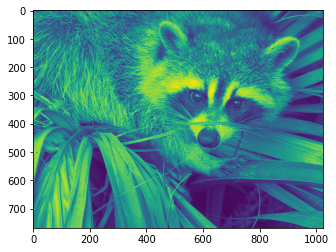

In [ ]:
face = misc.face(gray=True) 
plt.imshow(face)

**¿Cuál es el mapa de color default de imshow?**

Por defecto el color default de imshow es 'viridis'






 **Imprima la forma de f (propiedad shape de f) y compare contra la forma de la misma imagen a
color**



In [ ]:
f = misc.face(gray=True) #imagen en escala de grises
print("Gray image:",f.shape)

Gray image: (768, 1024)


In [ ]:
f = misc.face() # imagen en colores
print("Color image:", f.shape)

Color image: (768, 1024, 3)


Observamos como la componente de los colores no se contempla en la versión blanco/negro (gray)



**Se puede incrementar el contraste especificando los valores mínimo y máximo en el despliegue**



(-0.5, 1023.5, 767.5, -0.5)

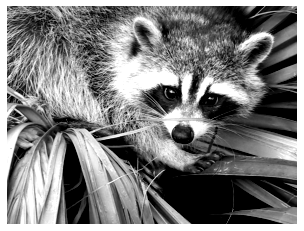

In [ ]:
f = misc.face(gray=True)
plt.imshow(f, cmap=plt.cm.gray, vmin=50, vmax=200)
plt.axis('off')


**Se pueden dibujar líneas de contorno con la instrucción contour.**



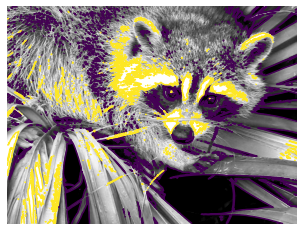

In [ ]:

plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
plt.axis('off')
plt.contour(f, [50, 200]) 



> **Investigue y ponga una breve descripción sobre la instrucción contour.**

Contour sirve para dibujar las líneas de contorno. Recibe como parámetros a variables predictoras X,Y, que pueden ser como una matriz y una variable de respuesta que sería Z como contornos.

contour([X,Y,] Z, [levels], *kwargs)

- X, Y similar a una matriz, opcional
   Las coordenadas de los valores en Z .

- X y Y debe ser tanto 2-D con la misma forma como Z (por ejemplo, creada a través de numpy.meshgrid), o ambos deben ser 1-D de    tal manera que es el número de columnas en Z y es el número de filas en Z .len(X) == Mlen(Y) == N

Si no se da, que se supone que son número entero índices, es decir , .X = range(M)Y = range(N)

- Z como una matriz (N, M)
  Los valores de altura sobre los que se dibuja el contorno.

- levels: int o similar a una matriz, opcional
  Determina el número y las posiciones de las curvas de nivel / regiones.


**Obtenga y despliegue los contornos de la imagen contour_gray.png con las siguientes
instrucciones (antes debe cargar la imagen contour_gray.png en la variable f):**

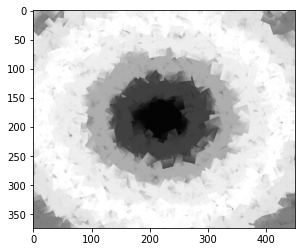

In [ ]:
f= misc.face(gray=True)
f= io.imread('/content/drive/MyDrive/Reconocimiento/homework/contour_gray.png')
plt.imshow(f, cmap=plt.cm.gray)

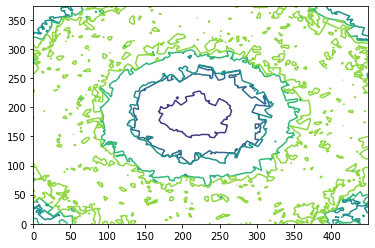

In [ ]:
plt.contour(f, 5)

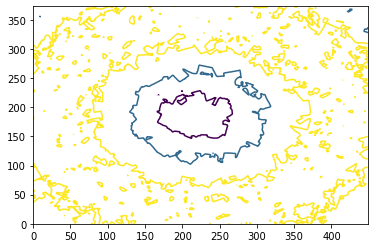

In [ ]:
plt.contour(f, [50, 100, 200])



# 5. Manipulaciones Básicas



**¿Cuánto vale el pixel face[0, 40]?**

In [ ]:
face = misc.face(gray=True)
face[0, 40]

127

Vale 127

**¿Qué efecto tiene la instrucción face 100:120 = 255 en la imagen de abajo?**



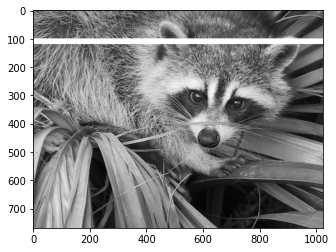

In [ ]:
face = misc.face(gray=True) 
face[100:120] = 255
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

Asigna el valor de 255 a los pixeles verticales del 100 al 120 (Es decir toda esa sección es una línea de clor blanco)

**Pinte una franja vertical gris en la imagen que vaya de la columna 200 a la columna 220. <br>
Tip: en
los índices tiene que elegir todas las filas**

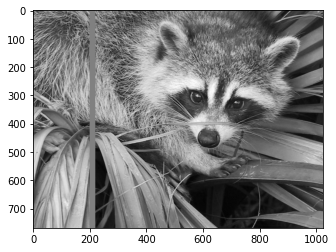

In [ ]:
face = misc.face(gray=True) 
face[:, 200:220] = 125
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

**¿Cuánto vale lx, ly?**

In [ ]:
lx, ly = face.shape
print(lx, ly)

768 1024


**¿Qué efecto tiene en la imagen la instrucción face[range(400), range(400)] = 255?**

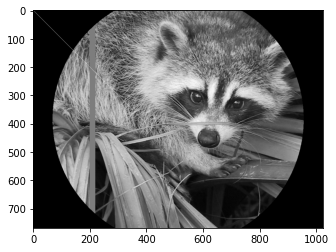

In [ ]:
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0

face[range(400), range(400)] = 255
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

Crea una linea del punto (0,0) al (400,400)

**Modifique el código para que la máscara sea un círculo más pequeño y despliegue el resultado.**

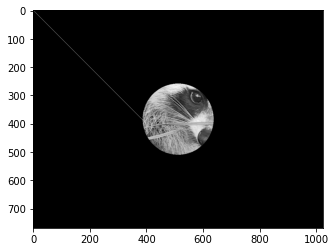

In [ ]:
face = misc.face(gray=True)
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 50
# Masks
face[mask] = 0

face[range(400), range(400)] = 255
plt.imshow(face, cmap=plt.cm.gray)
plt.show()



#6 Información Estadística 



**Se puede obtener información estadística de la imagen usando el módulo misc.**

In [ ]:
face = misc.face(gray=True)
face.mean()
face.max(), face.min()

(250, 0)

**Una manera de obtener el histograma es con la instrucción histogram de numpy.**<br>

**Despliegue el histograma de la imagen en grises del mapache original (es decir, antes de poner
las franjas y de aplicar la máscara)**


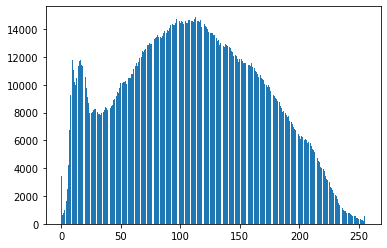

In [ ]:
face = misc.face(gray=True) 
face = io.imread('face.png')

hist, bins = np.histogram(face, bins=256, range=(0,256))
plt.bar(bins[0:-1], hist)
plt.show()

**Modifique el código para que sólo se tengan 64 bins en el histograma y muestre el histograma
resultante.**

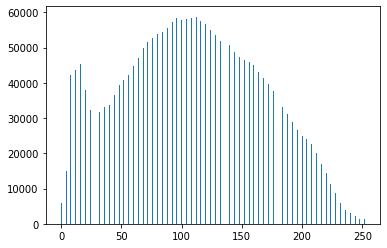

In [ ]:
face = misc.face(gray=True) 
face = io.imread('face.png')

hist, bins = np.histogram(face, bins=64, range=(0,256))
plt.bar(bins[0:-1], hist)
plt.show()

**Transformaciones geométricas**



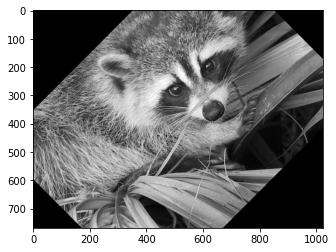

In [ ]:
face = misc.face(gray=True)
lx, ly = face.shape
# Recorte
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down Voltear verticalmente
flip_ud_face = np.flipud(face)
# Rotación
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.show()


**Investigue el operador // y ponga una breve descripción.**

El operador "//" sirve para calcular el cociente de una división. 
1. Su resultado siempre será un número entero

2. Este operador tiene la misma prioridad que la división

**¿Qué efecto tiene el signo negativo en crop_face = face[lx // 4: - lx // 4, ly //
4: - ly // 4]?**

El sentido de recorte 

**Voltee la imagen original del mapache, pero esta vez horizontalmente, de izquierda a derecha.**

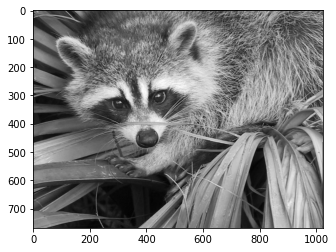

In [ ]:
f = misc.face(gray=True)
io.imwrite('face.png', f)

flip_ud_face = np.flipud(face)
rotate_face = ndimage.rotate(flip_ud_face, 180)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.show()
plt.show()